In [5]:
from IPython.display import Image

# Hashing Algorithms

The goal is to have a long message as input and produce an output which is much shorter called the hash or message digest. Furthermore, we want it to have certain properties.

- **Input**: long message
- **Output**: short fixed size block (called hash or message digest)
 
*We want the same input always produces the same output (deterministic)*

## *<font color=" #6495ED">Exercise</font>*

 - A *non* security related example of hash functions?
 - A security related example of hash functions?

*** There is a difference between hash function and cryptographic hash functions ***

### Desired properties
  - Pre-image: Given a hash *h* it is computationally infeasible to find a message *m* that produces *h*
  - Second preimage: Given message m, it is computationally infeasible to find a message m’, (m ≠ m’) such that, h(m) = h(m’)
  - Collisions: It is computationally difficult to find any two messages m, m’ (m ≠ m’) such that, h(m) = h(m’)
  

**Examples**:
 - Recommended Hash Algorithm (SHA-2, SHA-3) by NIST
 - <strike>SHA-1</strike>: output 160 bits being phased out (shattered.io)
 - <strike>MD2, MD4, and MD5</strike> by Ron Rivest [RFC1319, 1320, 1321]
 


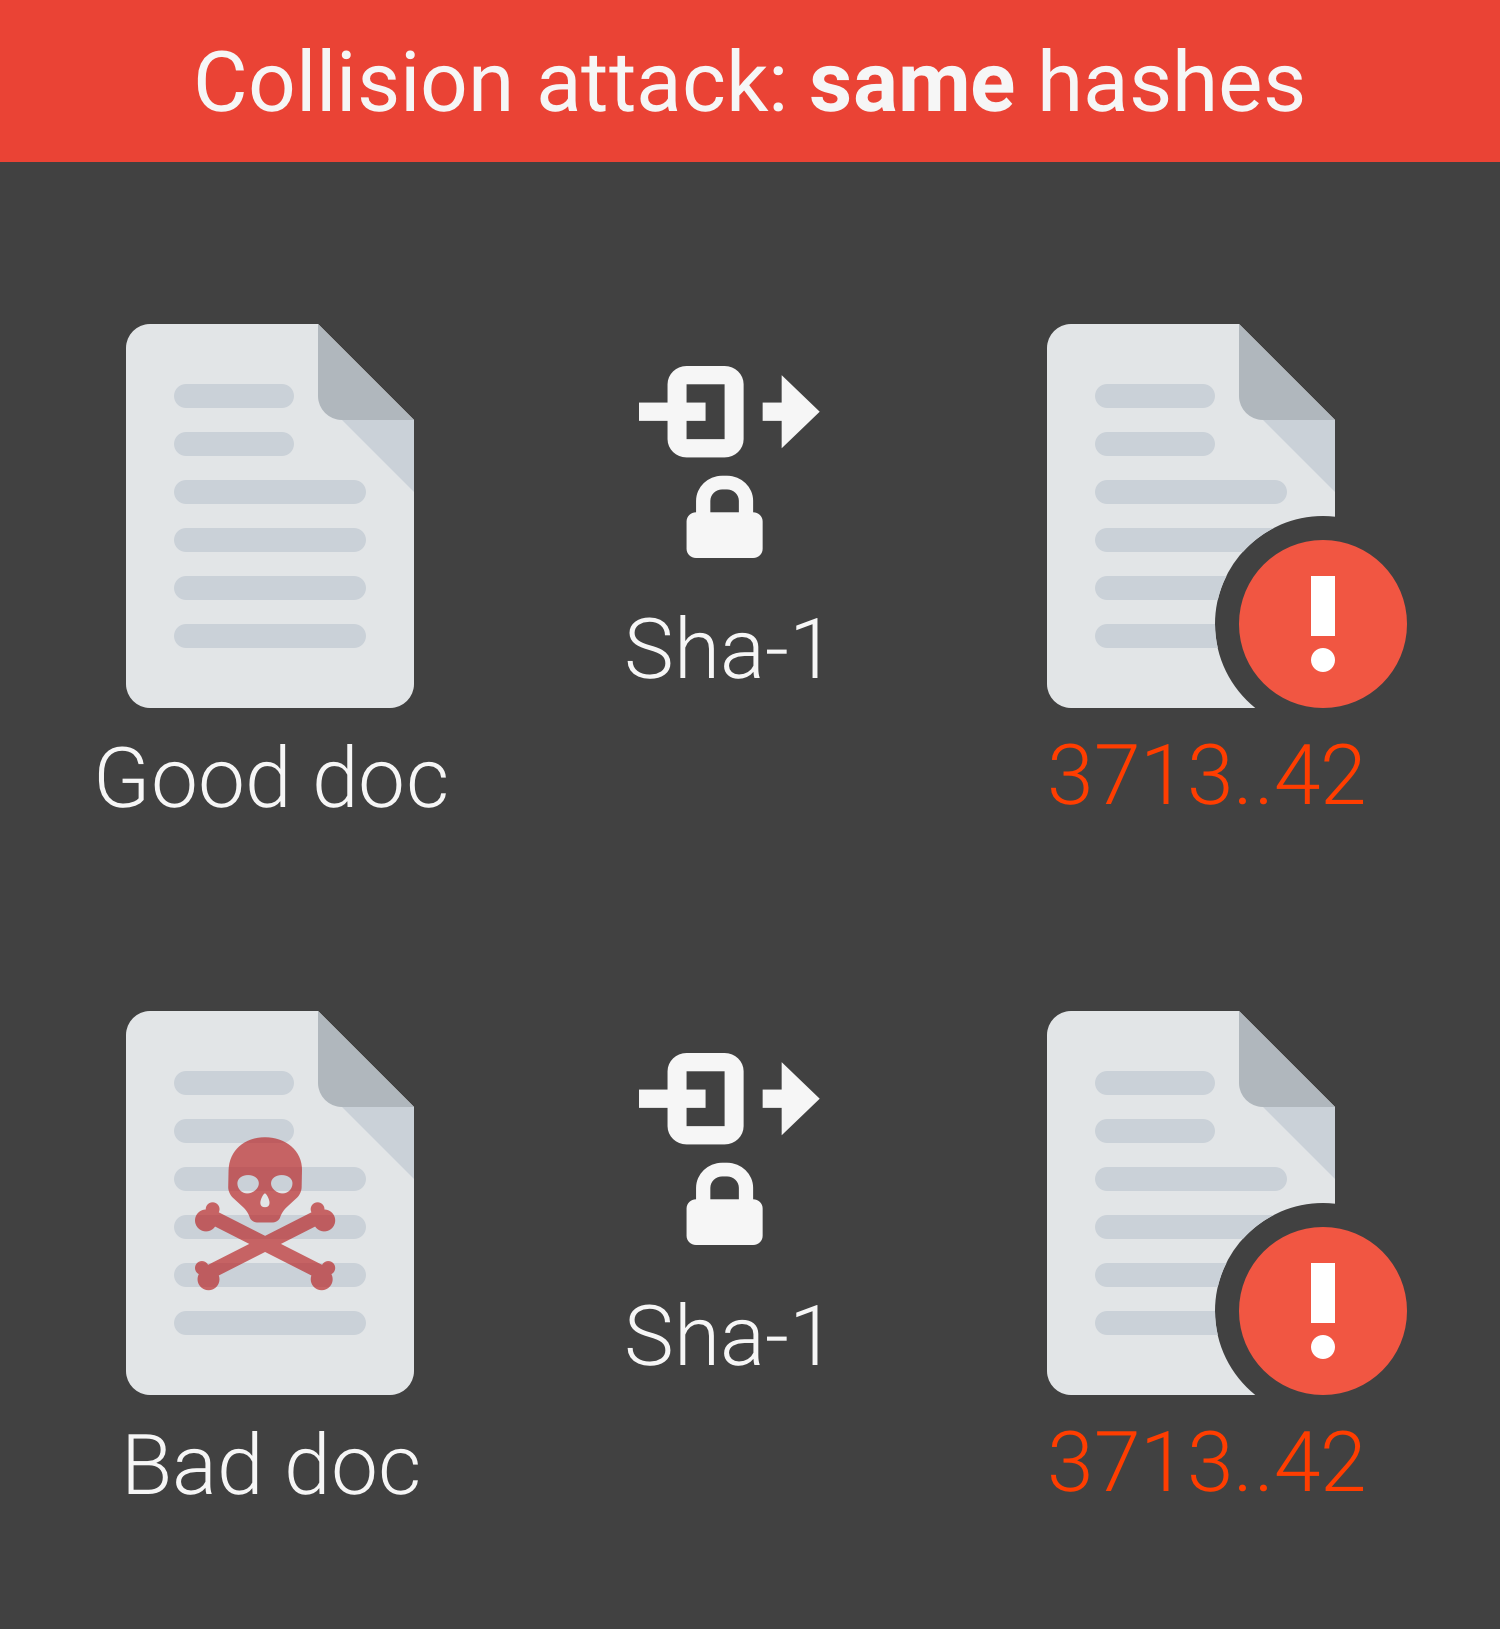

In [8]:
Image("/home/atrides/Desktop/Cryptography_Blockchain_101/Cryptography/pycon2017_crypto_tutorial/include/shattered_diagram.png")

### SHA Family

Secure Hash Algorithm (SHA) family, is a series of hashing algorithms. Ranging from SHA-0 to SHA-3. SHA-0 should never be used, it's advised to move from SHA-1 to SHA-2. SHA-3 is the most recent version, published in 2015.

 * SHA-1: Digest size (160), Block size (512)
 * SHA-2: Digest size (224, 256, 384, or 512), Block size (512, 1024)
 * SHA-3: Digest size (224, 256, 384, 512), Block size (1600)

In [1]:
from cryptography.hazmat.backends import default_backend
from cryptography.hazmat.primitives import hashes
import base64 # to produce human readable encoding of the bytes

In [3]:
digest = hashes.Hash(hashes.SHA256(), backend=default_backend())
print(digest)

In [4]:
digest.update(b"Snehil")
digest.update(b"kumar")

In [5]:
msg_digest = digest.finalize()

In [10]:
print(msg_digest, len(msg_digest))
print("base64 encoding:",base64.b64encode(msg_digest))
print(base64.b64encode(msg_digest).decode())

b'z\x97L_u\xdf\xa3\xc1.#;\x00<\xf9\x85\xcdct"\xe5\x94\xf3\x972\x1b\xe4Q\xa2\x02\x0b\xe7\x83' 32
base64 encoding: b'epdMX3Xfo8EuIzsAPPmFzWN0IuWU85cyG+RRogIL54M='
epdMX3Xfo8EuIzsAPPmFzWN0IuWU85cyG+RRogIL54M=


In [11]:
digest = hashes.Hash(hashes.SHA256(), backend=default_backend())
digest.update(b"Snehilkumar")
msg_digest = digest.finalize()
print(msg_digest, len(msg_digest))
print(base64.b64encode(msg_digest))

b'z\x97L_u\xdf\xa3\xc1.#;\x00<\xf9\x85\xcdct"\xe5\x94\xf3\x972\x1b\xe4Q\xa2\x02\x0b\xe7\x83' 32
b'epdMX3Xfo8EuIzsAPPmFzWN0IuWU85cyG+RRogIL54M='


In [12]:
digest = hashes.Hash(hashes.SHA256(), backend=default_backend())
digest.update(b"SnehilKumar")
msg_digest = digest.finalize()
print(msg_digest, len(msg_digest))
print(base64.b64encode(msg_digest))

b'\xf0\x85\xc4\xfa\xe8onB\xb2\x97\xe3\xbdD\x98\nV\xda\xba\xba:\xd1H\xdd\xe0\x80\xccM\xb9\xd2t\x83\xe8' 32
b'8IXE+uhvbkKyl+O9RJgKVtq6ujrRSN3ggMxNudJ0g+g='


## *<font color=" #6495ED">Exercise</font> *

 - Let's explore what other hashing algorithms are available and use a different one.

### Python Builtin Support

*"Additional algorithms may also be available depending upon the OpenSSL library that Python uses on your platform. On most platforms the sha3_224(), sha3_256(), sha3_384(), sha3_512(), shake_128(), shake_256() are also available."*

source: https://docs.python.org/3/library/hashlib.html

In [15]:
import hashlib
sha256 = hashlib.sha256() # uses sha-2
sha256.update(b"Snehilkumar")

msg_digest = sha256.digest()
# Notice the output size of the digest
print ("msg_digest:", len(msg_digest), len(msg_digest) * 8)
print ("base64 encoding:", base64.b64encode(msg_digest))

msg_digest: 32 256
base64 encoding: b'epdMX3Xfo8EuIzsAPPmFzWN0IuWU85cyG+RRogIL54M='


## *<font color=" #6495ED">Exercise</font> *

 - Let's see what other hashing algorithms our python supports.

In [16]:
sha256 = hashlib.sha3_256()  # uses sha-3
sha256.update(b"Snehilkumar")

msg_digest = sha256.digest()
# Notice the output size of the digest
print ("msg_digest:", len(msg_digest), len(msg_digest) * 8)
print ("base64 encoding:", base64.b64encode(msg_digest))

msg_digest: 32 256
base64 encoding: b'2t8osT68BoT5k2rRPrdneIZaLVgsH1K2I0PXf3WgIWQ='


### Hash-based message authentication code (HMAC)

HMACs are used for message authentications combined with a secret key. This provide integrity checking and authentication. An attacker can not forge the digest without knowing the secret key.

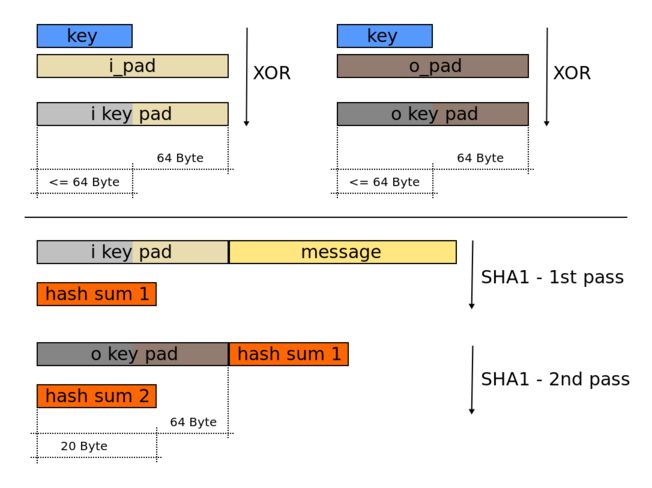

In [9]:
Image("/home/atrides/Desktop/Cryptography_Blockchain_101/Cryptography/pycon2017_crypto_tutorial/include/SHAhmac.png")

$ HMAC(K,m) = H((K\oplus opad) || H((K \oplus ipad) || m))$

### HMAC Calculation

In [17]:
from cryptography.hazmat.backends import default_backend
from cryptography.hazmat.primitives import hmac, hashes
import os
import base64

hmc_key = k = os.urandom(16)
hmc = hmac.HMAC(hmc_key, hashes.SHA256(), default_backend())
hmc.update(b"Snehil")
hmc_sig = hmc.finalize()
print (base64.b64encode(hmc_sig))

b'OlnsfaVL9TLNeVRaEugROHE6G8Po8uYs2jD3/MAFS0Y='


### HMAC Verification

In [22]:
# Verification Successufl
hmc = hmac.HMAC(hmc_key, hashes.SHA256(), default_backend())
hmc.update(b"Snehil")
hmc.verify(hmc_sig)

In [27]:
# Verification Fails
hmc = hmac.HMAC(hmc_key, hashes.SHA256(), default_backend())
hmc.update(b"Snehil")
hmc.verify(hmc_sig+b"1")

InvalidSignature: Signature did not match digest.